In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
import seaborn as sns

In [2]:
data=pd.read_csv(r"ML Outlier Removal 16952195440.csv")

In [4]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1fb13077350>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb11ae8b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb13075e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1fb1307ccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fb1307e250>],
 'means': []}

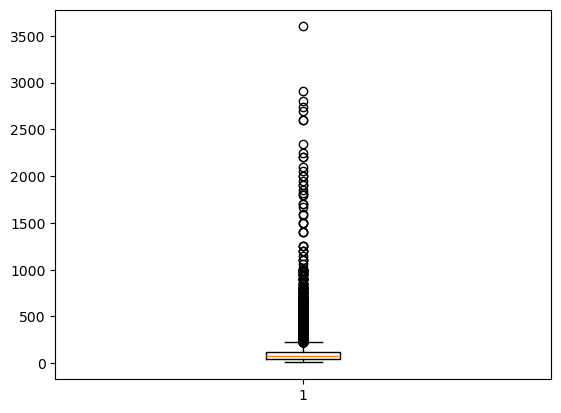

In [8]:
plt.boxplot(data["price"])

In [10]:
mean = data["price"].mean()
mean

112.5656265015015

In [11]:
std = data["price"].std()
std

148.9716737696744

In [13]:
zscore=(data["price"]- mean)/std
zscore

0       -0.493353
1        0.049905
2       -0.339431
3       -0.117913
4       -0.413271
           ...   
13315    0.795013
13316    1.929457
13317   -0.352857
13318    2.520173
13319   -0.641502
Name: price, Length: 13320, dtype: float64

In [14]:
data["zscore"]=zscore
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.493353
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.049905
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.339431
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.117913
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.413271
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,0.795013
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,1.929457
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,-0.352857
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,2.520173


In [26]:
data[~((data["zscore"]>3) & (data["zscore"]>-3))]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.493353
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.049905
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.339431
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.117913
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.413271
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,0.795013
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,1.929457
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,-0.352857
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,2.520173


<Axes: >

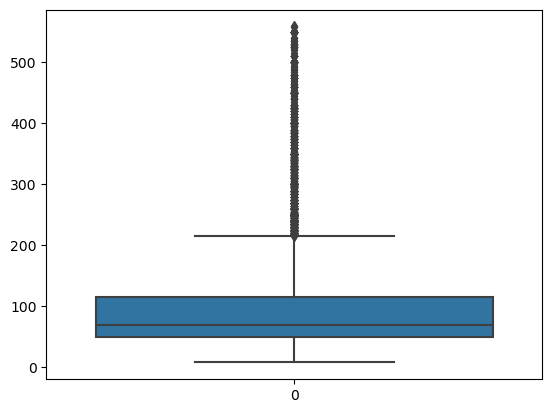

In [35]:
sns.boxplot(data[((data["zscore"]<3) & (data["zscore"]>-3))]["price"])

In [29]:
lb=mean-3*std
lb

-334.34939480752166

In [30]:
up=mean+3*std
up

559.4806478105247

<Axes: >

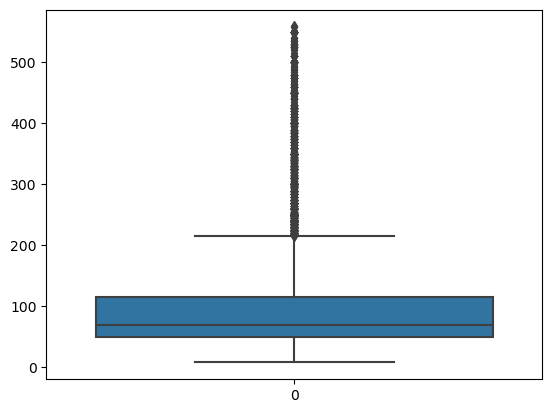

In [37]:
sns.boxplot(data[~((data["price"]<lb) | (data["price"]>up))]["price"])

In [38]:
import numpy as np

In [55]:
q3,q1=np.percentile(data["price"],(75,25))

In [56]:
q3,q1=data["price"].quantile((0.75,0.25))

In [57]:
q3

120.0

In [58]:
q1

50.0

In [43]:
iqr=q3-q1
iqr

70.0

In [48]:
ub=q3+1.5*iqr
ub

225.0

In [49]:
lb=q1-1.5*iqr
lb

-55.0

<Axes: >

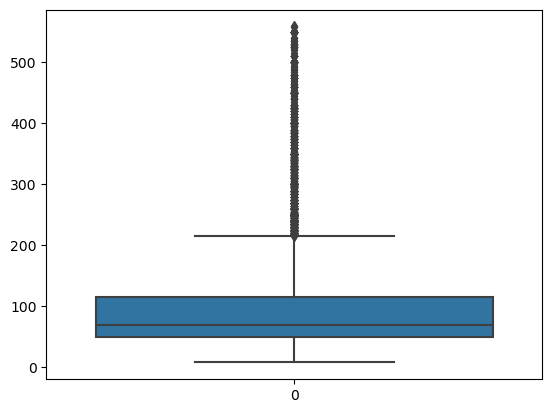

In [50]:
sns.boxplot(data[~((data["price"]<lb) | (data["price"]>up))]["price"])

In [3]:
data1=pd.read_csv(r"ML Logistics Regression Files16958214402.csv")

In [4]:
data1.columns=['age', 'outcome']
data1.columns

Index(['age', 'outcome'], dtype='object')

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model=LogisticRegression()

In [7]:
model.fit(data1[["age"]],data1["outcome"])

LogisticRegression()

In [ ]:
model.predict([[39]])

In [9]:
model.predict(data1[["age"]])

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0], dtype=int64)

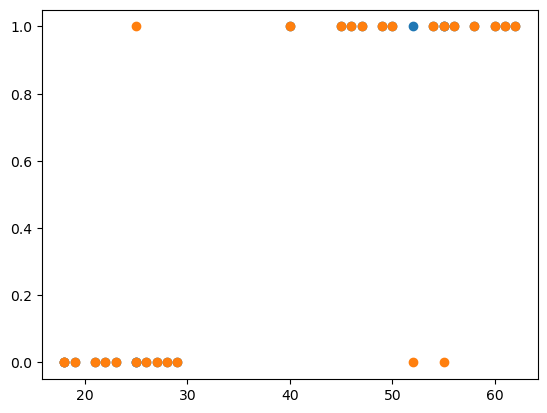

In [10]:
plt.scatter(data1["age"],model.predict(data1[["age"]]))
plt.scatter(data1["age"],data1["outcome"])
# plt.scatter(data1["age"],model.predict(data1[["age"]]))

In [11]:
model.score(data1[["age"]],data1["outcome"])

0.8888888888888888

<Axes: >

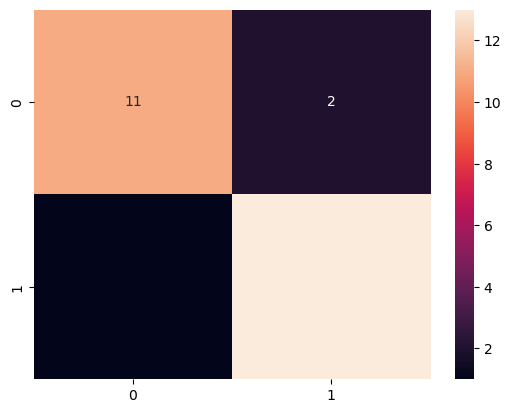

In [16]:
sns.heatmap(confusion_matrix(data1["outcome"],model.predict(data1[["age"]])),annot=True)

In [17]:
precision_score(data1["outcome"],model.predict(data1[["age"]]))

0.8666666666666667

In [18]:
recall_score(data1["outcome"],model.predict(data1[["age"]]))

0.9285714285714286

In [20]:
print(classification_report(data1["outcome"],model.predict(data1[["age"]])))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.87      0.93      0.90        14

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27

